In [1]:
import numpy as np
from astropy.coordinates import get_sun, get_moon, EarthLocation, AltAz
from astropy.time import Time
from lsst.sims.utils import Site
import matplotlib.pylab as plt
%matplotlib inline

In [55]:
def generate_sunsets(mjd_start, duration=.5):
    """Generate the sunset and twilight times for a range of dates
    
    Parameters
    ----------
    mjd_start : float
        The starting mjd
    duration : float (12.)
        How long to compute times for (years)
    """

    # Should also do moon-rise, set times.

    # end result, I want an array so that given an MJD I can:
    # look up if it's day, night, or twililight
    # What night number it is
    # When the next moon rise/set is.


    # Let's find the nights first, find the times where the sun crosses the meridian.
    site = Site('LSST')
    location = EarthLocation(lat=site.latitude, lon=site.longitude, height=site.height)
    # go on 1/10th of a day steps
    t_step = 0.1
    t = Time(np.arange(mjd_start, duration*365.25+mjd_start, t_step), format='mjd', location=location)
    sun = get_sun(t)
    aa = AltAz(location=location, obstime=t)
    sun_aa = sun.transform_to(aa)
    
    good = np.where(sun_aa.alt > 0)[0]
    alt_roll = sun_aa.alt.value - np.roll(sun_aa.alt.value, -1)
    
    
    return t, sun_aa

In [62]:
mjd_start=59853.5
t, ack = generate_sunsets(mjd_start=mjd_start)

In [63]:
good = np.where(ack.alt > 0)

In [64]:
# sign here show if it is rising or setting
alt_roll = ack.alt.value[good] - np.roll(ack.alt.value[good], -1)

In [65]:
# times where we changed from rising to setting
flipped = np.where(ack < 0)

TypeError: '<' not supported between instances of 'SkyCoord' and 'int'

(59853.5, 59854.5)

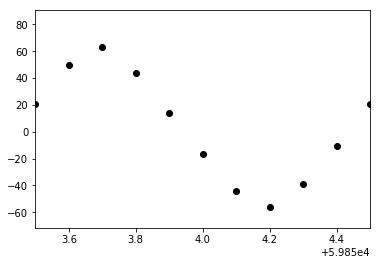

In [66]:
plt.plot(t.value, ack.alt, 'ko')
plt.xlim([t.value.min(), t.value.min()+1])
# So, I could just find all the local maxima. Then find the times of solar maximum, fit a peak
# Or, just find spots where it passes from positive to negative, that's the sunset. 

In [67]:
sunsets = np.where((ack.alt.value < 0) & (np.roll(ack.alt.value, 1) > 0))

In [68]:
ack.alt.value[sunsets[0]]

array([-16.8974479 , -16.75219342, -16.60554153, -16.45748846,
       -16.30802703, -16.15714675, -16.00483455, -15.85107619,
       -15.69585808, -15.53916926, -15.38100291, -15.22135744,
       -15.06023685, -14.89765073, -14.73361398, -14.56814643,
       -14.40127262, -14.23302158, -14.06342681, -13.89252633,
       -13.72036285, -13.54698388, -13.37244191, -13.1967944 ,
       -13.02010371, -12.84243664, -12.66386375, -12.48445822,
       -12.30429431, -12.12344578, -11.94198445, -11.75997928,
       -11.57749592, -11.39459699, -11.21134272, -11.027792  ,
       -10.8440037 , -10.66003798, -10.47595752, -10.29182843,
       -10.10772083,  -9.92370906,  -9.73987169,  -9.5562913 ,
        -9.37305426,  -9.19025053,  -9.00797354,  -8.82632011,
        -8.64539057,  -8.46528889,  -8.28612296,  -8.1080048 ,
        -7.93105088,  -7.75538213,  -7.58112356,  -7.40840318,
        -7.23735014,  -7.06809229,  -6.90075392,  -6.73545415,
        -6.57230648,  -6.41141907,  -6.25289561,  -6.09

In [69]:
# So now I could do finer steps in between those mjds and interpolate
# OR! I could do an interpolation to when I thought it would happen, and then do a fine grid around that spot.